In [78]:
# =====   Importing Libraries   ===== #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Data Processing
base = pd.read_csv(r'C:\Users\dheer\Desktop\DS Assignment\Dataset\traffic.csv', sep=";")

attributes = base.columns.tolist()
del(attributes[len(attributes)-1], attributes[0])

base.insert(0, 'Day', np.repeat([1,2,3,4,5],27))

dict_hours = {1: "7:00", 2: "7:30", 3: "8:00", 4: "8:30", 5: "9:00", 6: "9:30", 7: "10:00", 8: "10:30",
                 9: "11:00", 10: "11:30", 11: "12:00", 12: "12:30", 13: "13:00", 14: "13:30", 15: "14:00",
                 16: "14:30", 17: "15:00", 18: "15:30", 19: "16:00", 20: "16:30", 21: "17:00", 22: "17:30",
                 23: "18:00", 24: "18:30", 25: "19:00", 26: "19:30", 27: "20:00"}

In [81]:
#Total of each incident
summation = []
for i in range(len(attributes)):
    summation.append(base[attributes[i]].sum())
    
# Total of each incident per day
nday = 5
day_summary = pd.DataFrame(columns=attributes)
day_summary.insert(0, "Day", "Nan")

for n in range(1, nday+1):
    day_sum = []
    for i in range(len(attributes)):
        day_sum.append(base[attributes[i]].loc[base.Day == n].sum())
    df = pd.DataFrame([day_sum], columns=attributes)
    df.insert(0, "Day", n)
    day_summary = day_summary.append(df, ignore_index=True)

In [82]:
day_summary

,Day,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
0,1,3,8,0,3,1,0,0,0,0,0,0,0,0,1,0,0
1,2,14,26,0,14,2,1,0,0,1,0,0,0,3,1,1,0
2,3,8,32,1,17,3,0,0,0,12,1,6,1,2,1,9,1
3,4,11,26,0,7,5,0,1,1,2,0,10,5,9,2,2,1
4,5,10,26,3,16,5,0,0,0,1,0,0,1,17,1,5,0


In [103]:
# Checking the time at which the traffic is slowest

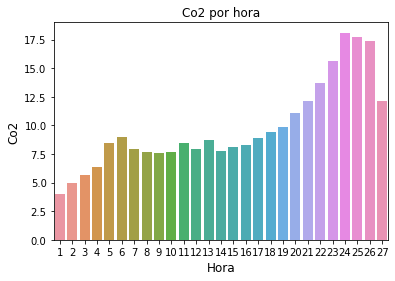

In [104]:
groupByHour = base.groupby(['Hour (Coded)'])

# Create dataframe with average values grouped by time
traffic_Hour = pd.DataFrame(groupByHour['Slowness in traffic (%)'].median().reset_index(name = 'Slowness in traffic (%)'))

sns.barplot(x="Hour (Coded)", y="Slowness in traffic (%)", data=traffic_Hour);

plt.title('Co2 por hora')
plt.ylabel('Co2', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.show()

In [105]:
# It can be clearly seen from graph that Traffic is slower at the end of the day, from 6 pm to 7:30 pm

In [ ]:
#Checking the factors that cause the most slowness

In [126]:
data = base.sort_values(by='Slowness in traffic (%)')[-20:]

In [127]:
#Remove time column and column with slowness percentage
dataProcess = data.drop(data.columns[[0, 17]], axis=1)

In [128]:
# Function to sum the occurrence number for each incident type
def createDataFrame (data):
    values = []
    keysWithValues = []
    keys = data.keys()
    
    for i in range(0, len(keys)):
        value = data[keys[i]].sum()
        if (value > 0):
            values.append(value)
            keysWithValues.append(keys[i])
    return (keysWithValues, values)

In [129]:
keys, values = createDataFrame(dataProcess)

In [130]:
df = pd.DataFrame([values], columns=keys)

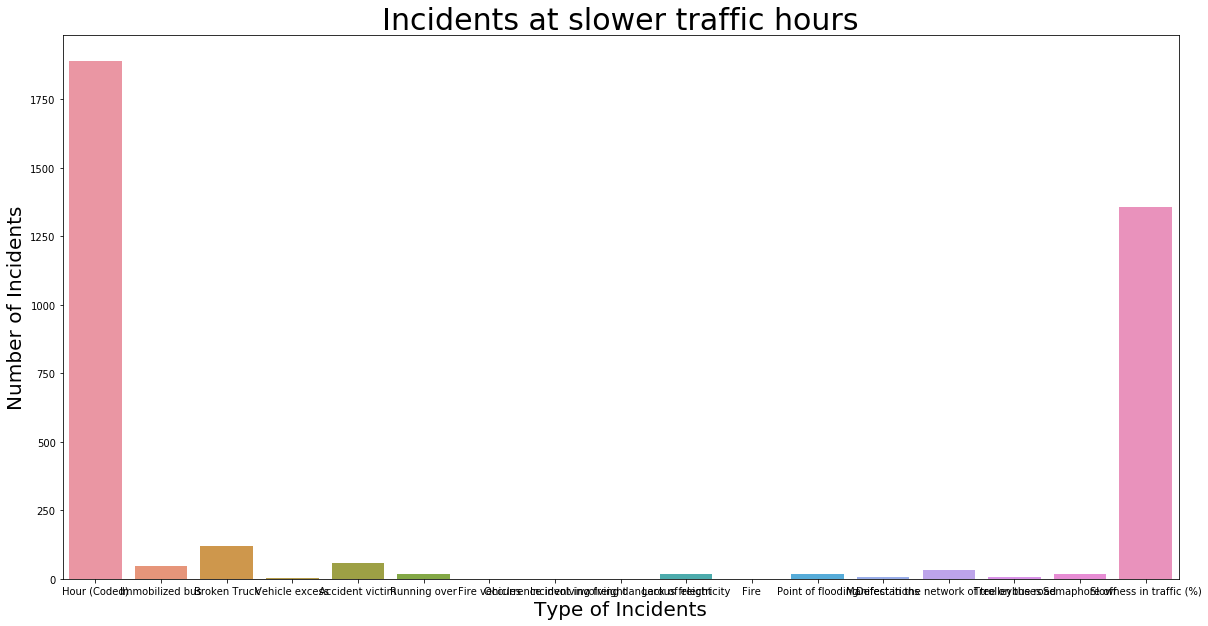

In [131]:
plt.figure(figsize=(20,10))

sns.barplot(data=df);

plt.title('Incidents at slower traffic hours', fontsize=30)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xlabel('Type of Incidents', fontsize=20)
plt.show()

In [83]:
# Graph plot for incident amount per day
def plot_graph(day, data):
    if day == 0:
        plt.barh(attributes, data, color='orange')
        plt.title("Total")
    else:
        plt.barh(attributes, data.loc[data.Day == day].values[0][1:])
        plt.title("Day {}".format(day))
    plt.grid(axis='x', linewidth='0.5')

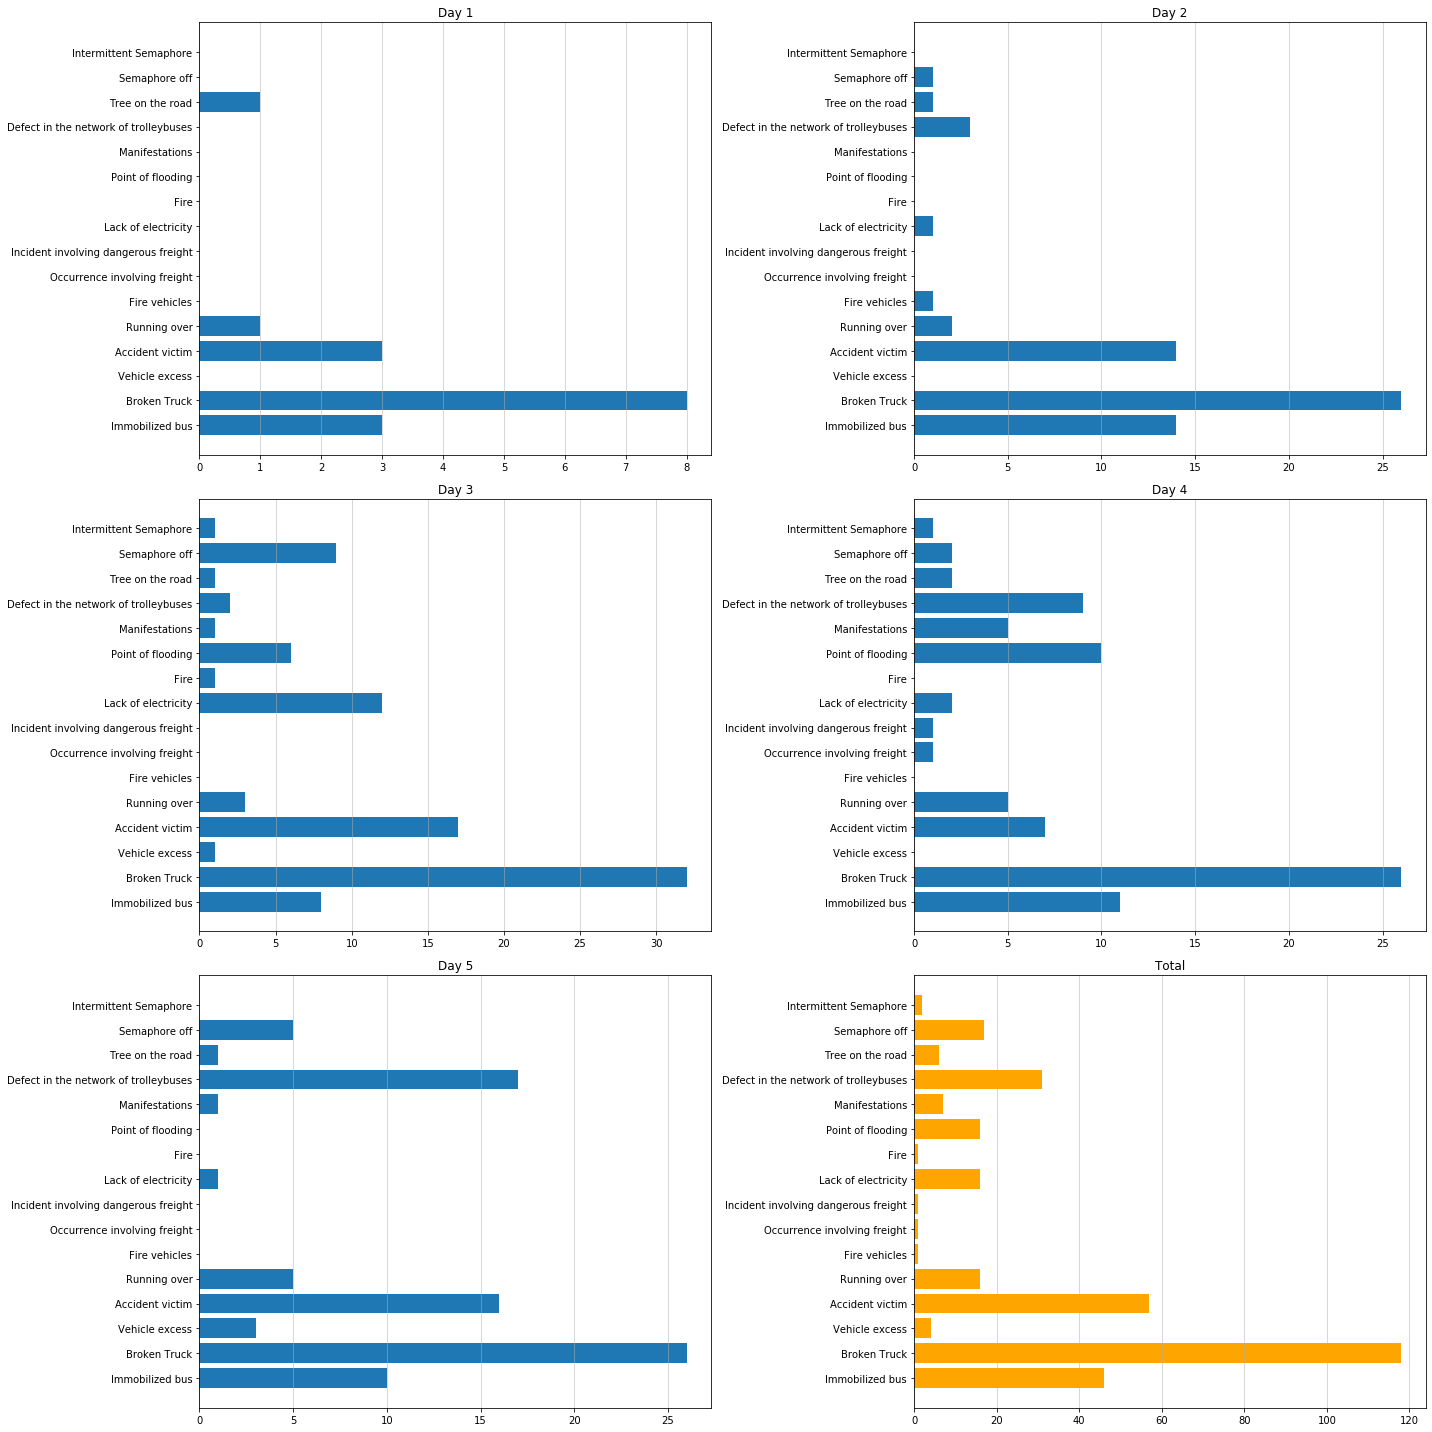

In [84]:

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plot_graph(1, day_summary)
plt.subplot(3,2,2)
plot_graph(2, day_summary)
plt.subplot(3,2,3)
plot_graph(3, day_summary)
plt.subplot(3,2,4)
plot_graph(4, day_summary)
plt.subplot(3,2,5)
plot_graph(5, day_summary)
plt.subplot(3,2,6)
plot_graph(0, summation)

plt.tight_layout()

In [86]:
# ===== Analysis of the Time and slowness in Traffic ===== #
Incident_base = base.iloc[:]
for n in range(len(base_incidents)-1, -1, -1):
    if Incident_base.iloc[n, 2:18].values.sum() != 0:
        Incident_base.drop(n, inplace=True)

average_time = []
average_incidents = []
for n in range(1, 28):
    average_time.append(base["Slowness in traffic (%)"].loc[base["Hour (Coded)"] == n].mean())
    average_incidents.append(Incident_base["Slowness in traffic (%)"].loc[Incident_base["Hour (Coded)"] == n].mean())

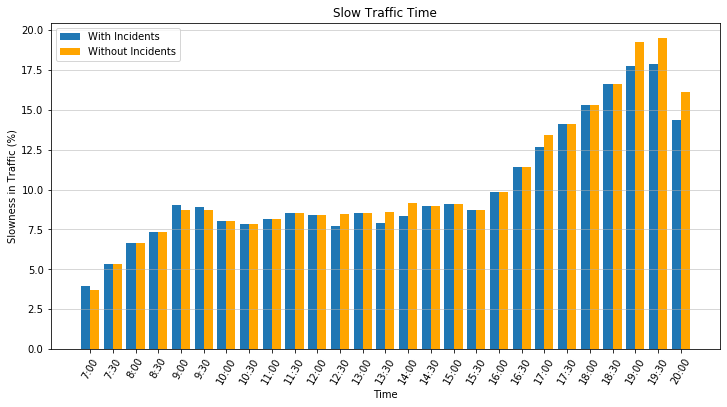

In [88]:
plt.figure(figsize=(12,6))
plt.bar(base["Hour (Coded)"].unique(), average_time,
             label="With Incidents", width=0.4, align="center")
plt.bar(base["Hour (Coded)"].unique()+0.4, average_incidents,
             label="Without Incidents", color="orange", width=0.4)
plt.legend()
plt.title("Slow Traffic Time")
plt.xlabel("Time")
plt.ylabel("Slowness in Traffic (%)")
plt.xticks(base["Hour (Coded)"].unique()+0.2, dict_hours.values(), rotation=60)
plt.grid(axis='y', linewidth="0.5")

In [91]:
# ===== Incident Time Analysis ===== #
incident_time = base.groupby("Hour (Coded)").mean()
incident_sum = base.groupby("Hour (Coded)").sum()
time_slowness = incident_time["Slowness in traffic (%)"]

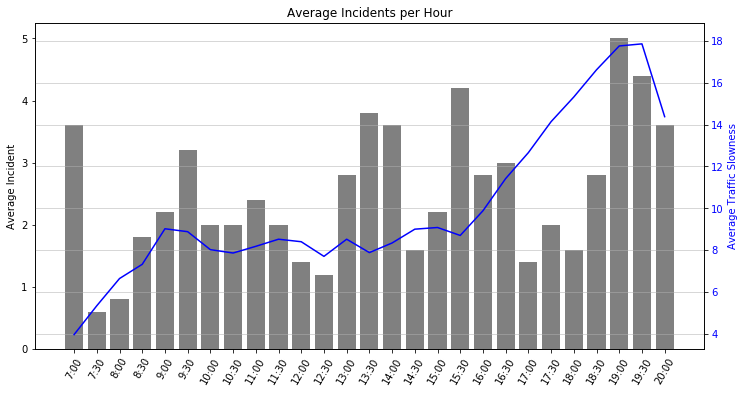

In [98]:
fig, ax1 = plt.subplots(figsize=(12,6))
for n in range(len(dict_hours)):
    ax1.bar(dict_hours[n+1], incident_time.iloc[n, 1:17].sum(), color="grey")
ax1.set_ylabel('Average Incident')
ax2 = ax1.twinx()
ax2.plot(list(dict_hours.values()), time_slowness, color='b')
plt.ylim(top=max(time_slowness)+1)
ax2.set_ylabel('Average Traffic Slowness', color='b')
for lb in ax2.get_yticklabels():
    lb.set_color('b')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.title("Average Incidents per Hour")
plt.grid(axis='y', linewidth="0.5")

In [99]:
# Plots the amount of a given incident per time
def plot_incident(incident):
    incid = incident_sum[incident]
    
    plt.figure(figsize=(12,5))
    for n in range(len(dict_hours)):
        plt.bar(dict_hours[n+1],  incid[n+1], color="grey")
    plt.xticks(rotation=60)
    plt.yticks(list(range(min(incid), max(incid)+1)))
    plt.grid(axis='y', linewidth="0.5")
    plt.title("Number of incidents per hour".format(incident))

 Incident Options:
 Immobilized bus
 Broken Truck
 Vehicle excess
 Accident victim
 Running over
 Fire vehicles
 Occurrence involving freight
 Incident involving dangerous freight
 Lack of electricity
 Fire
 Point of flooding
 Manifestations
 Defect in the network of trolleybuses
 Tree on the road
 Semaphore off
 Intermittent Semaphore


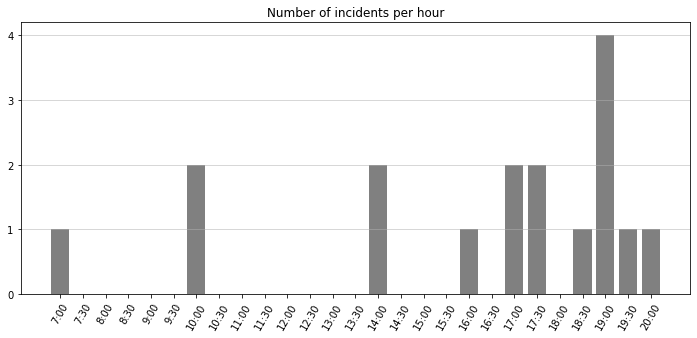

In [100]:
print(" Incident Options:", *attributes, sep='\n ')

plot_incident("Semaphore off")

In [38]:
# Plots the number of all Incidents in a given Time
def plot_hour(hour):
    for k, v in dict_hours.items():
        if v == hour:
            h = k
    plt.figure(figsize=(12,5))
    plt.barh(attributes, incident_sum.iloc[h-1, 1:17].values, color="grey")
    plt.xlabel("Number of Incidents")
    plt.title("Hour {}".format(hour))
    plt.grid(axis='x', linewidth="0.5")

Time Options:	7:00	7:30	8:00	8:30	9:00	9:30	10:00	10:30	11:00	11:30	12:00	12:30	13:00	13:30	14:00	14:30	15:00	15:30	16:00	16:30	17:00	17:30	18:00	18:30	19:00	19:30	20:00


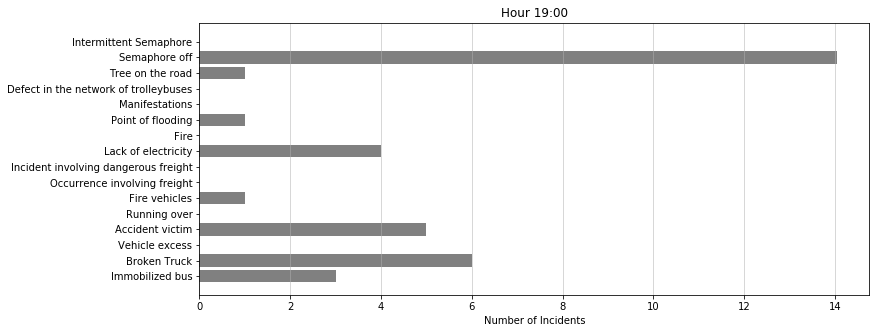

In [40]:
print("Time Options:", *dict_hours.values(), sep='\t')
plot_hour("19:00")